In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt


In [3]:
df = pd.read_csv('C9.6@1454_Primary_ar401_s2011-03-11T17_36_00_e2011-03-12T05_24_00.csv', delimiter='\t')#, header=0)
df2 = pd.read_csv('M1.0@265_Primary_ar115_s2010-08-06T06_36_00_e2010-08-06T18_24_00.csv', delimiter='\t')#, header=0)
df.head()
df2.head()

,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,...,BFLARE_LABEL_LOC,CFLARE_LOC,CFLARE_LABEL_LOC,MFLARE_LOC,MFLARE_LABEL_LOC,XFLARE_LOC,XFLARE_LABEL_LOC,XR_MAX,XR_QUAL,IS_TMFI
0,2010-08-06 06:36:00,980.993502,1.551270e+10,2.240189e+23,1.936230e+13,151.979938,3.821906e+12,1.766054e+22,-7.202945e+24,6004.885593,...,None,0.0,None,0.0,None,0.0,None,2.745600e-07,12,True
1,2010-08-06 06:48:00,987.271725,1.555048e+10,2.252867e+23,1.971309e+13,150.347978,3.570546e+12,1.781535e+22,-7.201674e+24,5907.434832,...,None,0.0,None,0.0,None,0.0,None,2.611100e-07,12,True
2,2010-08-06 07:00:00,985.015683,1.550109e+10,2.238914e+23,1.962561e+13,153.069350,4.284650e+12,1.775269e+22,-7.188077e+24,5909.535936,...,None,0.0,None,0.0,None,0.0,None,2.534100e-07,12,True
3,2010-08-06 07:12:00,993.944093,1.554684e+10,2.233768e+23,1.978907e+13,154.994888,3.122913e+12,1.799766e+22,-7.273269e+24,5779.465192,...,None,0.0,None,0.0,None,0.0,None,2.259200e-07,12,True
4,2010-08-06 07:24:00,994.364606,1.564230e+10,2.242762e+23,1.986232e+13,153.108332,3.790034e+12,1.826607e+22,-7.339826e+24,5692.225659,...,None,0.0,None,0.0,None,0.0,None,2.111100e-07,12,True


In [4]:
#df.info()
df.describe()

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,BFLARE,CFLARE,MFLARE,XFLARE,BFLARE_LOC,CFLARE_LOC,MFLARE_LOC,XFLARE_LOC,XR_MAX,XR_QUAL
count,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,...,60.0,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.0,6.000000e+01,60.0
mean,3225.837757,4.968521e+10,9.569992e+23,6.360733e+13,277.365399,1.627941e+13,4.147387e+22,-1.078431e+25,11596.328706,-0.163572,...,0.0,0.033333,0.016667,0.0,0.0,0.033333,0.016667,0.0,1.150519e-06,12.0
std,115.125903,1.068507e+09,3.262559e+22,1.932791e+12,61.286645,2.841401e+12,6.277917e+20,8.826699e+23,605.021913,0.014368,...,0.0,0.181020,0.129099,0.0,0.0,0.181020,0.129099,0.0,2.280425e-06,0.0
min,3037.604054,4.778223e+10,9.142534e+23,6.018842e+13,160.581031,1.089827e+13,4.036343e+22,-1.264242e+25,10683.910011,-0.189230,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,4.824200e-07,12.0
25%,3120.590642,4.872719e+10,9.289946e+23,6.164290e+13,236.660827,1.399894e+13,4.116054e+22,-1.106976e+25,11052.493404,-0.172751,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,6.146525e-07,12.0
50%,3252.555776,5.004831e+10,9.473100e+23,6.399713e+13,275.344908,1.598075e+13,4.130354e+22,-1.074644e+25,11437.606190,-0.163946,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,7.047700e-07,12.0
75%,3331.468502,5.046893e+10,9.866343e+23,6.518293e+13,331.110964,1.806080e+13,4.190900e+22,-1.030958e+25,12063.354125,-0.155588,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.699200e-07,12.0
max,3401.402127,5.129441e+10,1.013940e+24,6.697956e+13,384.707112,2.222598e+13,4.282975e+22,-9.178711e+24,12738.400619,-0.137116,...,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.352400e-05,12.0


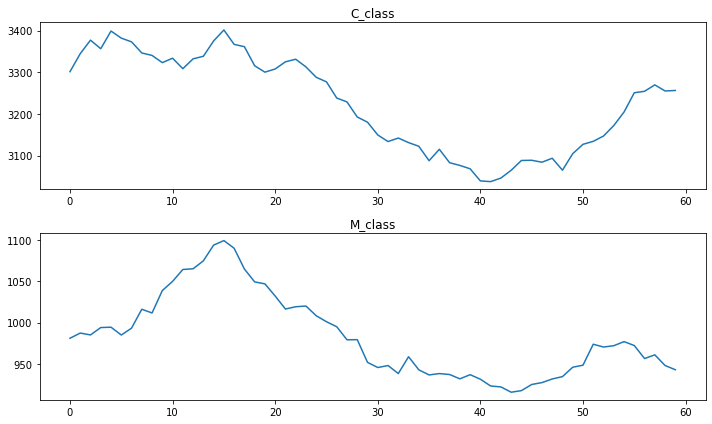

In [5]:
signal = df['TOTUSJH'].values
signal2 = df2['TOTUSJH'].values
#signal

# Plot the signal
#plt.plot(signal)
#plt.show()


original_signals = [signal, signal2]
ori_titles = ['C_class','M_class']

plt.figure(figsize=(10, 6))

for i, (sig, title) in enumerate(zip(original_signals, ori_titles), 1):
    plt.subplot(2, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()


In [6]:
coeffs = pywt.wavedec(signal, 'db4', level=3)
coeffs2 = pywt.wavedec(signal2, 'db4', level=3)


In [7]:
CA3, CD3, CD2, CD1 = coeffs
CA32, CD32, CD22, CD12 = coeffs2

#CA2, CD2, CD1 = coeffs

**Reconstructing and plotting the C class signal coefficients.**

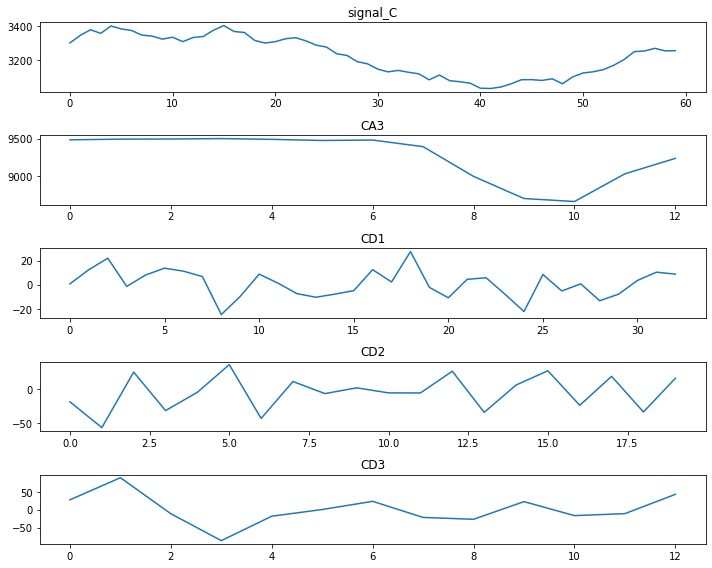

In [8]:
coeffi_plot = [signal,CA3, CD1, CD2, CD3]
coeffi_titles = ['signal_C','CA3', 'CD1', 'CD2', 'CD3']

plt.figure(figsize=(10, 8))

for i, (sig, title) in enumerate(zip(coeffi_plot, coeffi_titles), 1):
    plt.subplot(5, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

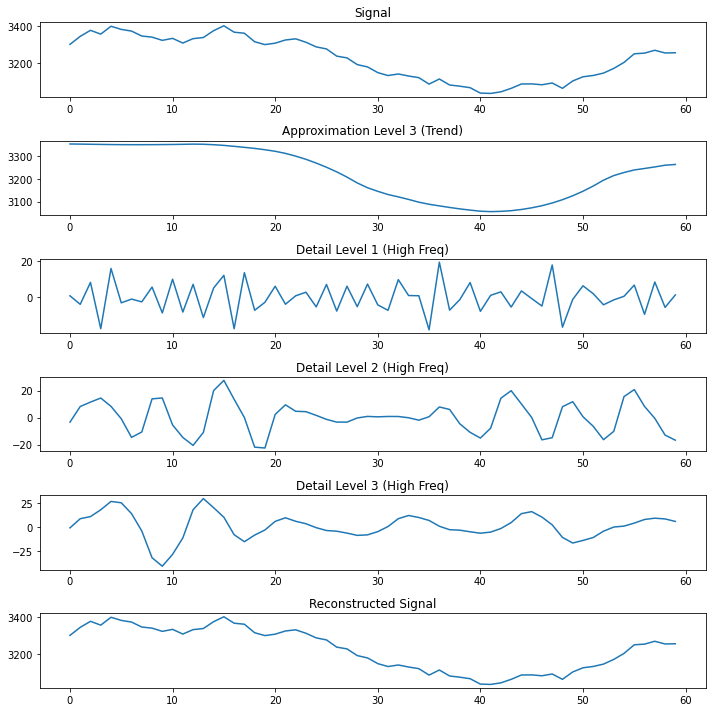

In [9]:
n = len(signal)

approx_a3 = pywt.upcoef('a', CA3, 'db4', take=signal.size, level=3)[:n]
detail_d3 = pywt.upcoef('d', CD3, 'db4', take=signal.size, level = 3)[:n]
detail_d2 = pywt.upcoef('d', CD2, 'db4', take=signal.size, level = 2)[:n]
detail_d1 = pywt.upcoef('d', CD1, 'db4', take=signal.size, level = 1)[:n]
recon_signal = pywt.waverec(coeffs, 'db4')

signals = [signal, approx_a3, detail_d1, detail_d2, detail_d3, recon_signal]
titles = ['Signal', 'Approximation Level 3 (Trend)', 'Detail Level 1 (High Freq)',
          'Detail Level 2 (High Freq)', 'Detail Level 3 (High Freq)', 'Reconstructed Signal']

plt.figure(figsize=(10, 10))

for i, (sig, title) in enumerate(zip(signals, titles), 1):
    plt.subplot(6, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

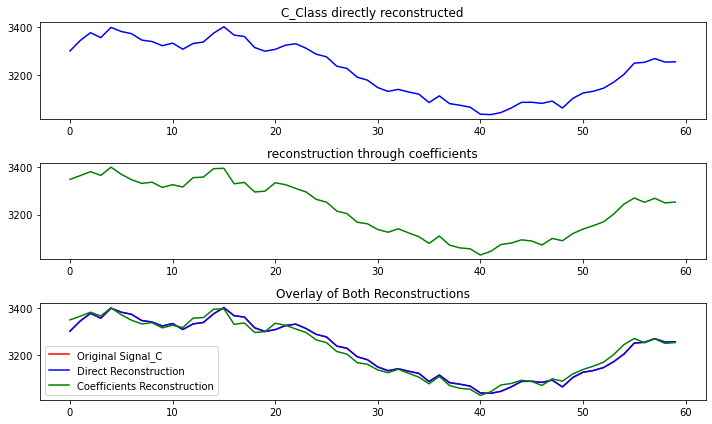

In [10]:
recon_c_coeff_sum = approx_a3 + detail_d1 + detail_d2 + detail_d3

fig, axs = plt.subplots(3, 1, figsize=(10, 6)) 
axs[0].plot(recon_signal, color='blue')
axs[0].set_title('C_Class directly reconstructed')
axs[1].plot(recon_c_coeff_sum, color='green')
axs[1].set_title('reconstruction through coefficients')
axs[2].plot(signal, color='red', label='Original Signal_C')
axs[2].plot(recon_signal, color='blue', label='Direct Reconstruction')
axs[2].plot(recon_c_coeff_sum, color='green', label='Coefficients Reconstruction')
axs[2].set_title('Overlay of Both Reconstructions')
axs[2].legend()
plt.tight_layout()
plt.show()


**Reconstructing and plotting the M class signal coefficients.**

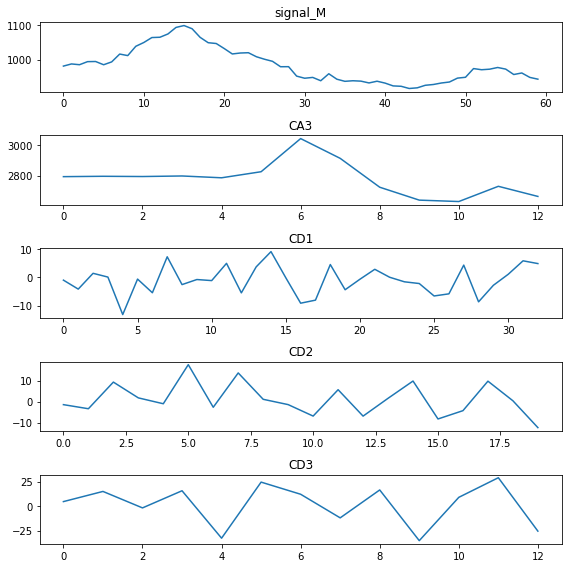

In [11]:
coeff2_plot = [signal2,CA32, CD12, CD22, CD32]
coeff2_titles = ['signal_M','CA3', 'CD1', 'CD2', 'CD3']

plt.figure(figsize=(8, 8))

for i, (sig, title) in enumerate(zip(coeff2_plot, coeff2_titles), 1):
    plt.subplot(5, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

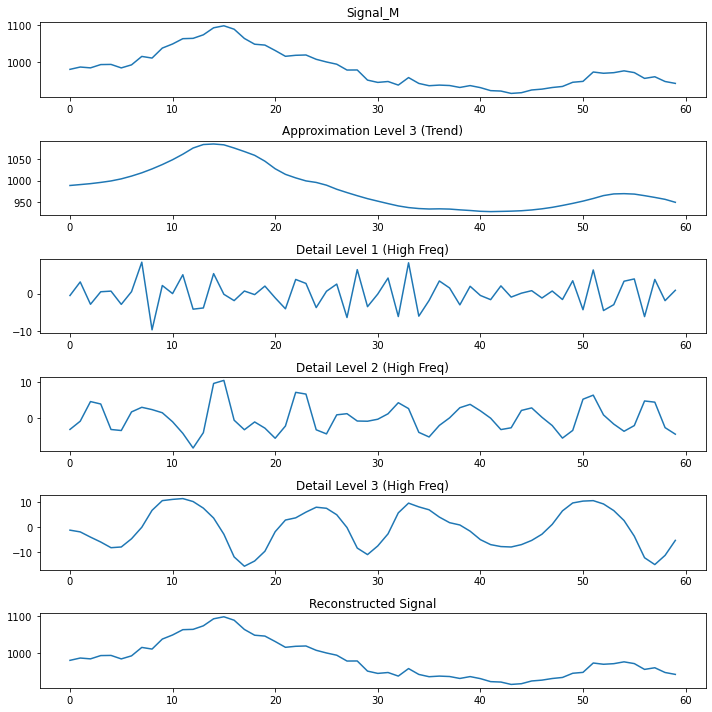

In [12]:
approx_a32 = pywt.upcoef('a', CA32, 'db4', take=signal.size, level=3)
detail_d32 = pywt.upcoef('d', CD32, 'db4', take=signal.size, level = 3)
detail_d22 = pywt.upcoef('d', CD22, 'db4', take=signal.size, level = 2)
detail_d12 = pywt.upcoef('d', CD12, 'db4', take=signal.size, level = 1)

recon_signal2 = pywt.waverec(coeffs2, 'db4')

signals_M = [signal2, approx_a32, detail_d12, detail_d22, detail_d32, recon_signal2]
titles_M = ['Signal_M', 'Approximation Level 3 (Trend)', 'Detail Level 1 (High Freq)',
          'Detail Level 2 (High Freq)', 'Detail Level 3 (High Freq)', 'Reconstructed Signal']

plt.figure(figsize=(10, 10))

for i, (sig, title) in enumerate(zip(signals_M, titles_M), 1):
    plt.subplot(6, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

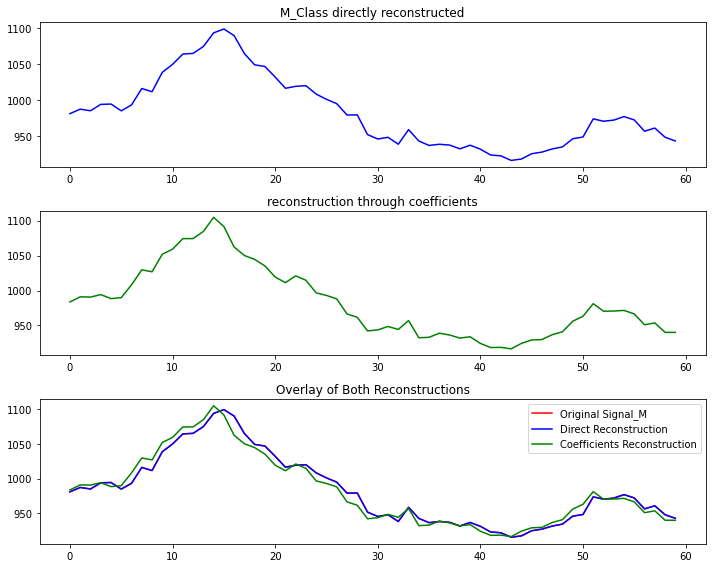

In [13]:
recon_M_coeff_sum = approx_a32 + detail_d12 + detail_d22 + detail_d32

fig, axs = plt.subplots(3, 1, figsize=(10, 8)) 
axs[0].plot(recon_signal2, color='blue')
axs[0].set_title('M_Class directly reconstructed')
axs[1].plot(recon_M_coeff_sum, color='green')
axs[1].set_title('reconstruction through coefficients')
axs[2].plot(signal2, color='red', label='Original Signal_M')
axs[2].plot(recon_signal2, color='blue', label='Direct Reconstruction')
axs[2].plot(recon_M_coeff_sum, color='green', label='Coefficients Reconstruction')
axs[2].set_title('Overlay of Both Reconstructions')
axs[2].legend()
plt.tight_layout()
plt.show()

**Applying various methods using the coefficients.**

In [14]:
#checking the statistical features from the coefficients

def feature_extraction(coefficients):
    stats = {
        'Mean': np.mean(coefficients),
        'Std': np.std(coefficients),
        'Var': np.var(coefficients),
        'Median': np.median(coefficients),
        'Min': np.min(coefficients),
        'Max': np.max(coefficients)
    }
    return stats

In [15]:
stat_CA3 = feature_extraction(CA3)
stat_CD3 = feature_extraction(CD3)
stat_CD2 = feature_extraction(CD2)
stat_CD1 = feature_extraction(CD1)


print("CA3 stats: ", stat_CA3)
print("CD3 stats: ", stat_CD3)
print("CD2 stats: ", stat_CD2)
print("CD1 stats: ", stat_CD1)



CA3 stats:  {'Mean': 9266.531817176745, 'Std': 298.0099353089852, 'Var': 88809.92154286552, 'Median': 9475.633591739153, 'Min': 8668.831528652485, 'Max': 9500.305634997672}
CD3 stats:  {'Mean': 1.0888422108271527, 'Std': 40.38847585173471, 'Var': 1631.228981626158, 'Median': -11.020782923200613, 'Min': -86.62546730829355, 'Max': 89.48359322777503}
CD2 stats:  {'Mean': -4.812178016553124, 'Std': 25.532361438881665, 'Var': 651.9014806456913, 'Median': -5.097504902772464, 'Min': -56.608779762209366, 'Max': 35.934228625442756}
CD1 stats:  {'Mean': 0.9236406644533567, 'Std': 11.353253252401478, 'Var': 128.89635941316473, 'Median': 1.1763825473634668, 'Min': -24.862823777394837, 'Max': 27.364603882490933}


In [16]:
#Evaluating the signal reconstruction using MSE and psnr

mse = np.mean((signal - recon_signal)**2)
psnr = 20*np.log10(np.max(signal)/np.sqrt(mse))

print(f"MSE = {mse}, PSNR = {psnr}")

MSE = 7.237830359838992e-25, PSNR = 312.0370755810419


We can see that the MSE value is almost equal to zero and PSNR value is very high. From this we can clearly see that the reconstructed signal is perfectly aligning with the original signal.

But we already know that from the visualization plots of the signal and reconstructed signal, but we can see it mathematically too now.


In [17]:
coeffs

[array([9483.9846878 , 9493.04679926, 9494.80677061, 9500.305635  ,
        9490.08418699, 9475.63359174, 9480.97679993, 9393.66879648,
        9001.00717632, 8708.70190066, 8668.83152865, 9034.92820296,
        9238.93754689]),
 array([ 27.65196873,  89.48359323, -11.27930835, -86.62546731,
        -18.27267741,   0.49057969,  23.37675514, -21.66433513,
        -26.85150269,  22.59806648, -16.61629486, -11.02078292,
         42.88435414]),
 array([-18.69907521, -56.60877976,  24.98415006, -31.57345082,
         -4.63434759,  35.93422863, -43.07818741,  11.17892339,
         -6.59501974,   1.87077499,  -5.56066222,  -5.64143368,
         26.29699586, -34.17996504,   5.94417879,  26.98754838,
        -23.8330756 ,  18.73895319, -33.60685803,  15.83154147]),
 array([  0.64340479,  12.43539141,  21.88153239,  -1.49890922,
          7.98997537,  13.64113571,  11.13711348,   6.68603221,
        -24.86282378,  -9.78837231,   8.68030924,   1.17638255,
         -7.51505636, -10.47901808,  -7.9

In [18]:
threshold = 50#30#20#10

thresholded_coeffs = [np.where(np.abs(array) < threshold, 0, array) for array in coeffs]

reconstructed_signal = pywt.waverec(thresholded_coeffs, 'db4', mode='symmetric')



In [19]:
coeffs_lossy = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

reconstructed_lossy = pywt.waverec(coeffs_lossy, 'db4')

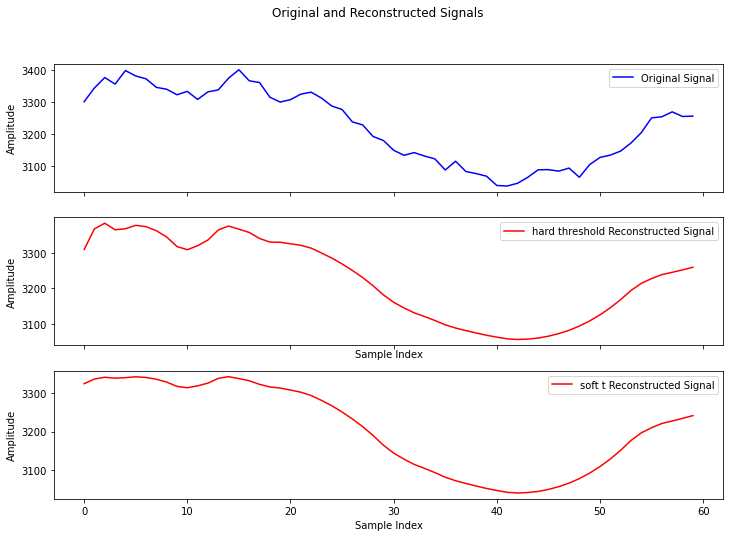

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot original signal
axs[0].plot(np.arange(len(signal)), signal, label='Original Signal', color='blue')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot reconstructed signal
axs[1].plot(np.arange(len(reconstructed_signal)), reconstructed_signal, label='hard threshold Reconstructed Signal', color='red')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

axs[2].plot(np.arange(len(reconstructed_lossy)), reconstructed_lossy, label='soft t Reconstructed Signal', color='red')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.suptitle('Original and Reconstructed Signals')
plt.show()


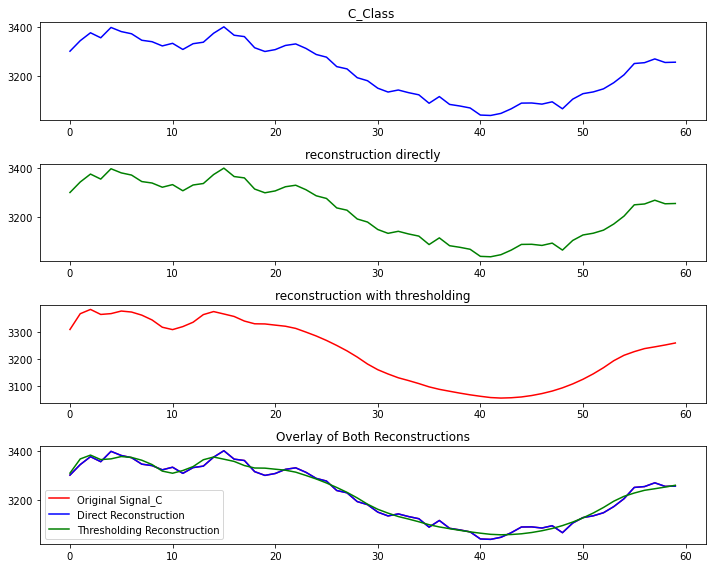

In [21]:
fig, axs = plt.subplots(4, 1, figsize=(10, 8)) 
axs[0].plot(signal, color='blue')
axs[0].set_title('C_Class ')
axs[1].plot(recon_signal, color='green')
axs[1].set_title('reconstruction directly')
axs[2].plot(reconstructed_signal, color='red')
axs[2].set_title('reconstruction with thresholding')
axs[3].plot(signal, color='red', label='Original Signal_C')
axs[3].plot(recon_signal, color='blue', label='Direct Reconstruction')
axs[3].plot(reconstructed_signal, color='green', label='Thresholding Reconstruction')
axs[3].set_title('Overlay of Both Reconstructions')
axs[3].legend()
plt.tight_layout()
plt.show()

**Evaluation of the Lossy reconstruction.**

In [22]:
#Mean square error for the reconstruction with thresholding
mse_thresholding = np.mean((signal - reconstructed_lossy)**2)

#Peak signal to noise ratio for the reconstruction with thresholding
psnr_thresholding = 20*np.log10(np.max(signal)/np.sqrt(mse_thresholding))

print(f"MSE = {mse_thresholding}, PSNR = {psnr_thresholding}")

MSE = 634.7054990564478, PSNR = 42.60743696972253


The MSE of 634.705 is a relatively small value compared to the scale of the coefficients, suggesting that, on average, the reconstructed signal is close to the original.

The reconstructed lossy signal, despite the compression (thresholding), maintains a reasonably small average squared difference from the original signal, considering the scale of the coefficients.

**C series sample normalization.**

In [23]:
signal

array([3301.36247067, 3344.49509511, 3377.00497671, 3356.42526089,
       3398.83809206, 3381.89961843, 3372.94775849, 3346.27817267,
       3340.34851528, 3323.05151621, 3333.72623205, 3308.51205976,
       3332.18912582, 3338.2862753 , 3375.05814568, 3401.40212741,
       3366.8894717 , 3361.29836027, 3315.56027804, 3300.20984293,
       3307.8512616 , 3325.01273602, 3331.22829442, 3312.76995246,
       3287.90312868, 3276.93373335, 3238.1316334 , 3228.76510564,
       3192.62332677, 3180.15486386, 3149.50358212, 3133.7584053 ,
       3142.12306176, 3131.22476232, 3122.40143568, 3087.74925379,
       3115.15825945, 3082.97437201, 3076.46561987, 3068.35357947,
       3039.28217732, 3037.60405392, 3046.116498  , 3064.84982747,
       3088.31718695, 3088.82487341, 3084.15957411, 3093.67421803,
       3064.99172109, 3104.5917337 , 3127.07102092, 3134.23662868,
       3146.91141502, 3172.06593895, 3204.5097257 , 3250.81338476,
       3254.29816793, 3269.70460992, 3255.11798003, 3256.25491

In [31]:
#min-max
min_value = np.min(signal)
max_value = np.max(signal)
min_max_normalized = (signal - min_value) / (max_value - min_value)
min_max_normalized



array([0.72501323, 0.84357522, 0.93293766, 0.8763686 , 0.99295204,
       0.94639194, 0.92178527, 0.84847651, 0.8321772 , 0.78463159,
       0.81397401, 0.74466586, 0.80974885, 0.82650856, 0.92758625,
       1.        , 0.90513238, 0.88976366, 0.76403985, 0.72184491,
       0.74284947, 0.79002255, 0.80710774, 0.75636986, 0.68801649,
       0.65786406, 0.55120572, 0.52545922, 0.42611351, 0.39184048,
       0.30758692, 0.26430693, 0.28729951, 0.25734251, 0.23308914,
       0.137838  , 0.21317926, 0.12471291, 0.1068218 , 0.08452361,
       0.00461279, 0.        , 0.02339882, 0.07489257, 0.13939912,
       0.14079464, 0.12797077, 0.15412441, 0.07528261, 0.18413423,
       0.2459248 , 0.26562146, 0.30046163, 0.36960582, 0.45878657,
       0.58606504, 0.59564393, 0.63799281, 0.59789741, 0.60102258])

In [25]:
#z-score
mean = np.mean(signal)
std = np.std(signal)
z_score_signal = (signal - mean) / std

In [32]:
#robust scaling
median_value = np.median(signal)
iqr = np.percentile(signal, 75) - np.percentile(signal, 25)
normalized_robust = (signal - median_value) / iqr
normalized_robust

array([ 0.23144532,  0.43598374,  0.59014825,  0.49255756,  0.69368266,
        0.61335904,  0.57090859,  0.44443924,  0.41632032,  0.33429654,
        0.38491692,  0.26534926,  0.37762783,  0.40654101,  0.58091622,
        0.70584153,  0.5421797 ,  0.51566619,  0.29877248,  0.22597947,
        0.2622157 ,  0.34359681,  0.37307149,  0.28554053,  0.16762003,
        0.11560226, -0.06840046, -0.1128173 , -0.28420456, -0.34333103,
       -0.4886819 , -0.56334681, -0.52368093, -0.57536156, -0.61720249,
       -0.78152596, -0.65155022, -0.80416884, -0.83503387, -0.87350183,
       -1.01136079, -1.01931858, -0.97895188, -0.89011691, -0.77883278,
       -0.77642528, -0.79854851, -0.7534293 , -0.88944403, -0.70165755,
       -0.59505894, -0.56107904, -0.50097417, -0.38168937, -0.22783829,
       -0.00826256,  0.00826256,  0.08132117,  0.01215018,  0.01754159])

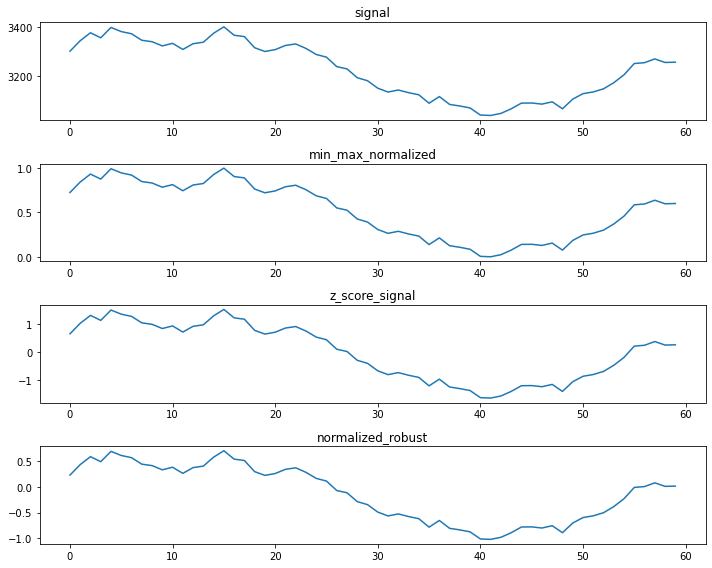

In [27]:
normalized_signals = [signal, min_max_normalized, z_score_signal, normalized_robust]
norm_titles = ['signal','min_max_normalized', 'z_score_signal', 'normalized_robust']

plt.figure(figsize=(10, 8))

for i, (sig, title) in enumerate(zip(normalized_signals, norm_titles), 1):
    plt.subplot(4, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

**Decomposition and Reconstruction after normalization using RObust Scaling.**

In [34]:
#decomposition of the signal and reconstruction of the signal after normalization

coeffs_norm = pywt.wavedec(normalized_robust, 'db4', level=3)

CA3_norm, CD3_norm, CD2_norm, CD1_norm = coeffs_norm

n = len(signal)

approx_a3_norm = pywt.upcoef('a', CA3_norm, 'db4', take=signal.size, level=3)[:n]
detail_d3_norm = pywt.upcoef('d', CD3_norm, 'db4', take=signal.size, level = 3)[:n]
detail_d2_norm = pywt.upcoef('d', CD2_norm, 'db4', take=signal.size, level = 2)[:n]
detail_d1_norm = pywt.upcoef('d', CD1_norm, 'db4', take=signal.size, level = 1)[:n]
recon_signal_norm = pywt.waverec(coeffs_norm, 'db4')

recon_norm_coeff_sum = approx_a3_norm + detail_d1_norm + detail_d2_norm + detail_d3_norm



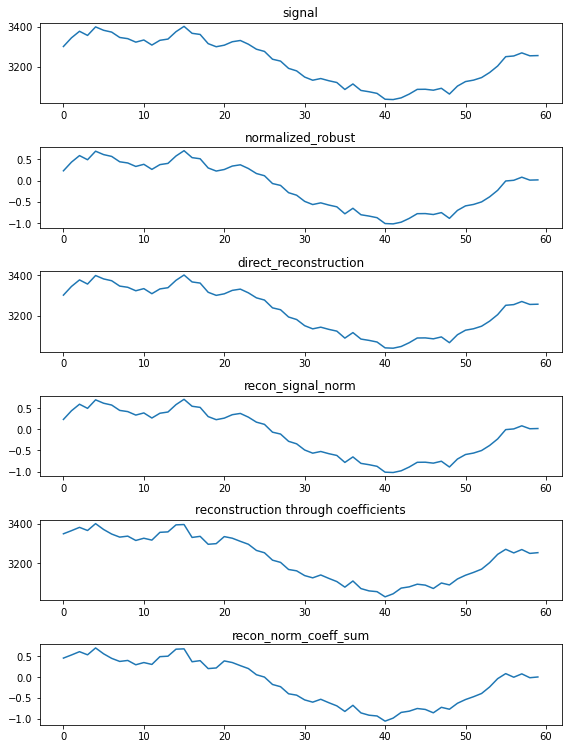

In [43]:
plots_norm = [signal, normalized_robust, recon_signal,recon_signal_norm, recon_c_coeff_sum,  recon_norm_coeff_sum]
plots_titles = ['signal','normalized_robust', 'direct_reconstruction', 'recon_signal_norm','reconstruction through coefficients',  'recon_norm_coeff_sum']

plt.figure(figsize=(8, 12))

for i, (sig, title) in enumerate(zip(plots_norm, plots_titles), 1):
    plt.subplot(7, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

**Thresholding on the normalized signal for lossy decomposition.**

In [45]:
threshold_2 = 0.5#0.3#0.2#0.1

norm_coeffs_lossy = [pywt.threshold(c, threshold_2, mode='soft') for c in coeffs_norm]
norm_reconstructed_lossy = pywt.waverec(norm_coeffs_lossy, 'db4')

**Evaluation of lossy decomposition on the normalized signal.**

In [46]:
#Mean square error for the reconstruction with thresholding
mse_thresholding_norm = np.mean((normalized_robust - norm_reconstructed_lossy)**2)

#Peak signal to noise ratio for the reconstruction with thresholding
psnr_thresholding_norm = 20*np.log10(np.max(normalized_robust)/np.sqrt(mse_thresholding_norm))

print(f"MSE = {mse_thresholding_norm}, PSNR = {psnr_thresholding_norm}")

MSE = 0.039280897203813975, PSNR = 11.032330120596878


**Plotting all these findings.**

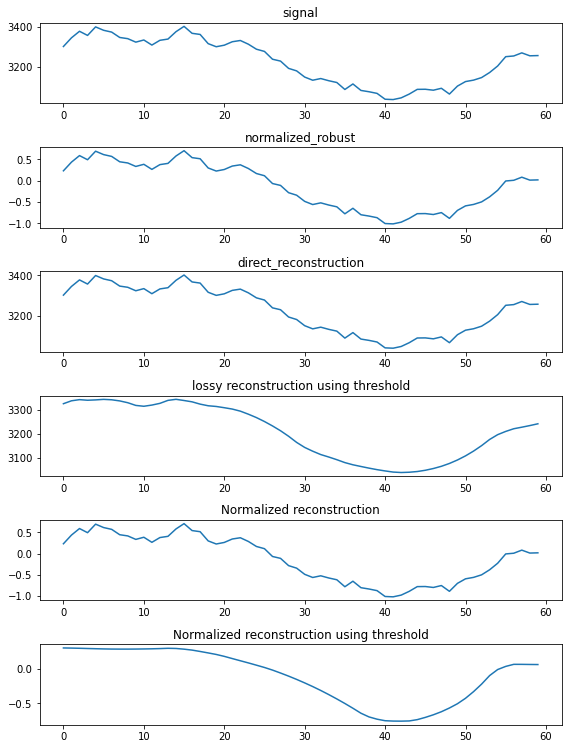

In [47]:
new_norm = [signal, normalized_robust, recon_signal, reconstructed_lossy, recon_signal_norm, norm_reconstructed_lossy]
new_titles = ['signal','normalized_robust', 'direct_reconstruction', 'lossy reconstruction using threshold','Normalized reconstruction', 'Normalized reconstruction using threshold']

plt.figure(figsize=(8, 12))

for i, (sig, title) in enumerate(zip(new_norm, new_titles), 1):
    plt.subplot(7, 1, i)
    plt.plot(sig)
    plt.title(title)

plt.tight_layout()
plt.show()

In [28]:
wavelet = 'db4'
level = 3

In [29]:
import networkx as nx

def plot_wavelet_packet_tree(wavelet_packet, ax=None):
  if ax is None:
    fig, ax = plt.subplots(figsize=(12, 6))
  G = nx.Graph()
  for node in wavelet_packet.get_level(level, order="natural"):
    G.add_node(node.path, label=f"{node.path}\n{node.data.shape}", color="lightblue")
    parent_path = node.path[:-1]
    if parent_path:
      G.add_edge(parent_path, node.path)
  pos = nx.spring_layout(G)  
  nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color="lightblue", alpha=0.8)
  nx.draw_networkx_edges(G, pos, ax=ax, edge_color="gray", alpha=0.6)
  labels = nx.get_node_attributes(G, 'label')
  nx.draw_networkx_labels(G, pos, labels, font_size=8)
  ax.set_title("Wavelet Packet Decomposition Tree")
  ax.axis("off")
  
wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='symmetric', maxlevel=level)



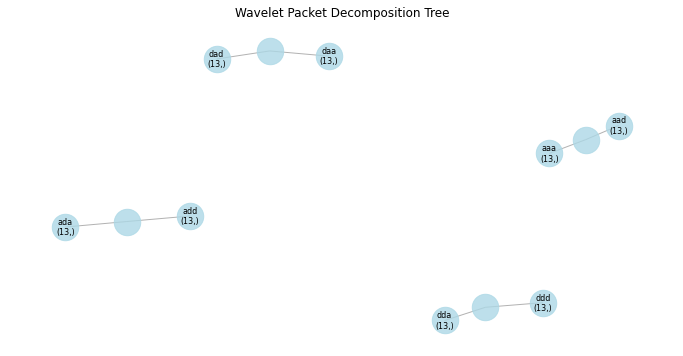

In [30]:
plot_wavelet_packet_tree(wp)
plt.show()